# Libraary

In [1]:
import pickle
import numpy as np
import pandas as pd
import json

# Functions

In [2]:
def plot_data_dict_acc_in_pdf(data: dict, title="", path='./figures/', legend_loc=f'lower right',linewidth=None, figsize=None, show=False):
    import os
    import matplotlib.pyplot as plt

    if not os.path.exists(path):
        os.makedirs(path)

    # Create a plot
    X = data["x"]
    file_name = data['name']
    if data["dual_axis"]:
        fig, ax1 = plt.subplots()
        Y_1, Y_2 = data["y"]
        Legend_1, Legend_2 = data["legends"]
        label_x, (label_y1, label_y2) = data["labels"]

        ax1.set_xlabel(label_x)
        ax1.set_ylabel(label_y1, color='b')
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # List of colors
        for i, (Y, legend) in enumerate(zip(Y_1, Legend_1)):
            ax1.plot(X, Y, label=legend, color=colors[i % len(colors)])  # Use modulo to loop through colors
        ax1.legend(loc='upper left')

        ax2 = ax1.twinx()
        ax2.set_xlabel(label_x)
        ax2.set_ylabel(label_y2, color='r')
        for i, (Y, legend) in enumerate(zip(Y_2, Legend_2)):
            ax2.plot(X, Y, label=legend, color=colors[(i + len(Y_1)) % len(colors)])  # Start from a new color
        ax2.legend(loc='lower right')

        max_acc = data["max_acc_g"]
        plt.title(title+f":max({max_acc})")        
    else:
        if figsize is not None:
            plt.figure(figsize=figsize)
        plt.grid()
        Y = data["y"]
        Legends = data["legends"]
        label_x, label_y = data["labels"]
        for y in Y:
            print(f'Length-> X={len(X)}, Y={len(y)}')
            if linewidth is not None:
                plt.plot(X, y, linewidth=linewidth)
            else: plt.plot(X,y)
        plt.xlabel(label_x)
        plt.ylabel(label_y)
        plt.title(title)
        plt.legend(Legends, loc = legend_loc )

    # Save the plot as a PDF file
    plt.savefig(f'{path}{file_name}.pdf', bbox_inches='tight')
    # Show the plot (optional)
    if show:
        plt.show()

## Filenames for creating plot figure

In [3]:
files = [f'/home/sujit/Github/FedLearn/result/fedproposedvImp_cifar_nc_4_mix_CE_10_lr_0_001_B_50_C_15_E_10_252.json', 
         f'/home/sujit/Github/FedLearn/result/fedproposedvImp_GLR_cifar_nc_4_mix_CE_10_lr_0_001_B_50_C_15_E_10_252.json',
         f'/home/sujit/Github/FedLearn/result/fedSat_cifar_nc_4_mix_CE_10_lr_0_001_B_50_C_15_E_10_251.json'
         ]
s_file = files[0].split('/')
method = s_file[-1].split("_")[0]
print(method)

fedproposedvImp


dict_keys(['name', 'x', 'dual_axis', 'y', 'legends', 'labels', 'max_acc_g'])
dict_keys(['name', 'x', 'dual_axis', 'y', 'legends', 'labels', 'max_acc_g'])
dict_keys(['name', 'x', 'dual_axis', 'y', 'legends', 'labels', 'max_acc_g'])


Length-> X=251, Y=251
Length-> X=251, Y=251
Length-> X=251, Y=251


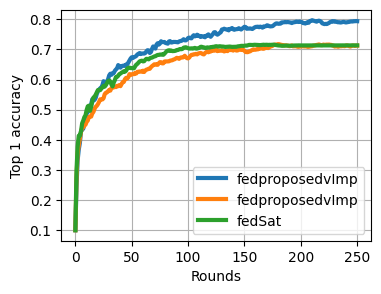

Length-> X=251, Y=251
Length-> X=251, Y=251
Length-> X=251, Y=251


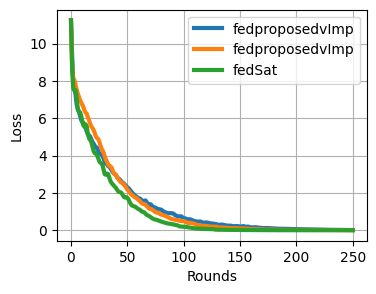

In [4]:
X=None
Y, L=[], []
Legends = []
for file in files:
    with open(file, 'r') as f:
        # Load the JSON data
        data = json.load(f)
        x = data['x']
        y, l = data['y']
        if X is not None:
            if len(X)>len(x):
                X = x
        else: X = x
        # print(f'Y length: {len(y)}, \n{y}')
        Y.append(y[0])
        L.append(l[0])
        print(data.keys())
        s_file = file.split('/')
        method = s_file[-1].split("_")[0]
        Legends.append(method)
plot_data_dict_acc = {}
plot_data_dict_acc["name"] = 'Exp1-Acc'
plot_data_dict_acc['x'] = X
plot_data_dict_acc['y'] = [y[:len(x)] for y in Y]
plot_data_dict_acc["legends"] = Legends
plot_data_dict_acc["labels"] = ["Rounds", "Top 1 accuracy"]
plot_data_dict_acc["dual_axis"] = False
Title = f'Title'
plot_data_dict_acc_in_pdf(data=plot_data_dict_acc, linewidth=3, figsize=[4,3], show=True )
plot_data_dict_loss = {}
plot_data_dict_loss["name"] = 'Exp1-Loss'
plot_data_dict_loss['x'] = X
plot_data_dict_loss['y'] = [y[:len(x)] for y in L]
plot_data_dict_loss["legends"] = Legends
plot_data_dict_loss["labels"] = ["Rounds", "Loss"]
plot_data_dict_loss["dual_axis"] = False
Title = f'Title'
plot_data_dict_acc_in_pdf(data=plot_data_dict_loss,legend_loc=f'upper right', linewidth=3, figsize=[4,3], show=True )

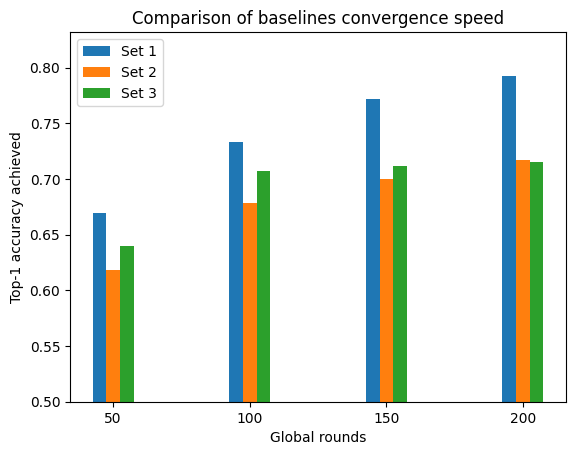

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x-coordinates for each set of bars
bar_x = [50, 100, 150, 200]

# Extract the maximum values for each set of bars from plot_data_dict_acc['y']
Y = []
for y in plot_data_dict_acc['y']:
    bar_y = []
    last_pos = 0
    for pos in bar_x:
        bar_y.append(max(y[last_pos:pos]))
        last_pos = pos
    Y.append(bar_y)

# Determine the width of each bar group
bar_width = 0.1  # Adjust as needed

# Create the x-positions for each set of bars
x_positions = np.arange(len(bar_x))

# Plot each set of bars with adjusted x-positions
for i, bar_y in enumerate(Y):
    plt.bar(x_positions + i * bar_width, bar_y, width=bar_width, label=f'Set {i+1}')

# Add labels and title
plt.xlabel('Global rounds')
plt.ylabel('Top-1 accuracy achieved')
plt.title('Comparison of baselines convergence speed')

# Add legend
plt.legend()
# Set a minimum y-value
min_y_value = 0.5  # Adjust as needed
plt.ylim(bottom=min_y_value)

# Set the x-axis ticks to the middle of each group of bars
plt.xticks(x_positions + (len(Y) - 1) * bar_width / 2, bar_x)
# Save the plot as a PDF file
plt.savefig(f'figures/bar_example.pdf', bbox_inches='tight')
# Show plot
plt.show()


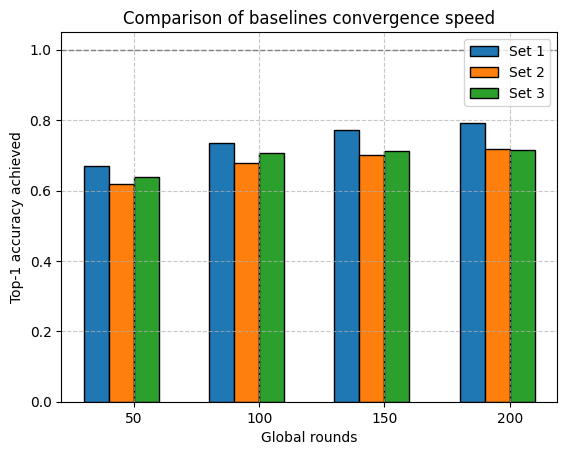

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x-coordinates for each set of bars
bar_x = [50, 100, 150, 200]

# Extract the maximum values for each set of bars from plot_data_dict_acc['y']
Y = []
for y in plot_data_dict_acc['y']:
    bar_y = []
    last_pos = 0
    for pos in bar_x:
        bar_y.append(max(y[last_pos:pos]))
        last_pos = pos
    Y.append(bar_y)

# Determine the width of each bar group
bar_width = 0.2  # Adjust as needed

# Create the x-positions for each set of bars
x_positions = np.arange(len(bar_x))

# Define colors for each set of bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Adjust as needed

# Plot each set of bars with adjusted x-positions and colors
for i, (bar_y, color) in enumerate(zip(Y, colors)):
    plt.bar(x_positions + i * bar_width, bar_y, width=bar_width, label=f'Set {i+1}', color=color, edgecolor='black')

# Add labels and title
plt.xlabel('Global rounds')
plt.ylabel('Top-1 accuracy achieved')
plt.title('Comparison of baselines convergence speed')

# Add legend
plt.legend()
# Set a minimum y-value
min_y_value = 0.5  # Adjust as needed
plt.ylim(bottom=min_y_value)
# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add horizontal line for reference
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.xticks(x_positions + (len(colors) - 1) * bar_width / 2, bar_x)

# Save the plot as a PDF file
plt.savefig(f'figures/bar_example.pdf', bbox_inches='tight')
# Show plot
plt.show()


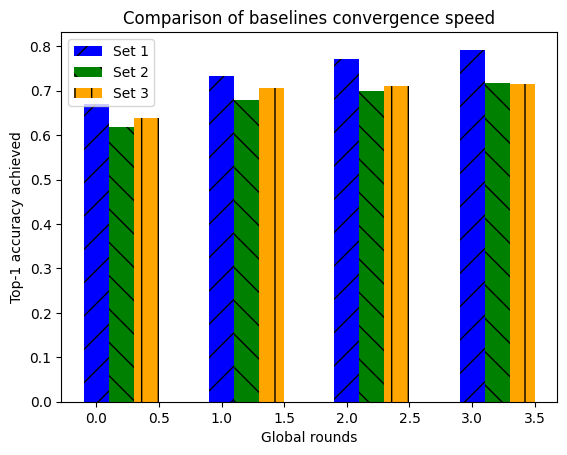

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x-coordinates for each set of bars
bar_x = [50, 100, 150, 200]

# Extract the maximum values for each set of bars from plot_data_dict_acc['y']
Y = []
for y in plot_data_dict_acc['y']:
    bar_y = []
    last_pos = 0
    for pos in bar_x:
        bar_y.append(max(y[last_pos:pos]))
        last_pos = pos
    Y.append(bar_y)

# Determine the width of each bar group
bar_width = 0.2  # Adjust as needed

# Create the x-positions for each set of bars
x_positions = np.arange(len(bar_x))

# Define different colors and patterns for each set of bars
colors = ['blue', 'green', 'orange', 'red']
patterns = ['/', '\\', '|', '-']

# Plot each set of bars with adjusted x-positions, colors, and patterns
for i, (bar_y, color, pattern) in enumerate(zip(Y, colors, patterns)):
    plt.bar(x_positions + i * bar_width, bar_y, width=bar_width, label=f'Set {i+1}', color=color, hatch=pattern)

# Add labels and title
plt.xlabel('Global rounds')
plt.ylabel('Top-1 accuracy achieved')
plt.title('Comparison of baselines convergence speed')

# Add legend
plt.legend()

# Show plot
plt.show()


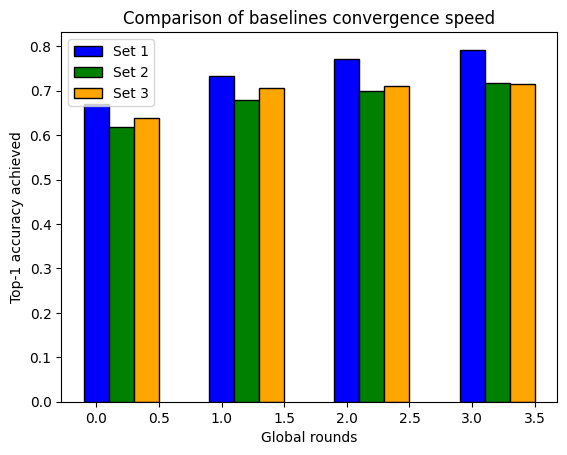

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x-coordinates for each set of bars
bar_x = [50, 100, 150, 200]

# Extract the maximum values for each set of bars from plot_data_dict_acc['y']
Y = []
for y in plot_data_dict_acc['y']:
    bar_y = []
    last_pos = 0
    for pos in bar_x:
        bar_y.append(max(y[last_pos:pos]))
        last_pos = pos
    Y.append(bar_y)

# Determine the width of each bar group
bar_width = 0.2  # Adjust as needed

# Create the x-positions for each set of bars
x_positions = np.arange(len(bar_x))

# Define unique colors for each set of bars
colors = ['blue', 'green', 'orange', 'red']

# Plot each set of bars with adjusted x-positions and colors
for i, (bar_y, color) in enumerate(zip(Y, colors)):
    plt.bar(x_positions + i * bar_width, bar_y, width=bar_width, label=f'Set {i+1}', color=color, edgecolor='black')

# Add labels and title
plt.xlabel('Global rounds')
plt.ylabel('Top-1 accuracy achieved')
plt.title('Comparison of baselines convergence speed')

# Add legend
plt.legend()

# Show plot
plt.show()
